# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-15 (56일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat 중 내과 분석 (page 305 복습)

## 진료과목 중 내과만 자세히 살피기

공공 테이터 포털 (data.go.kr) 에서 각 정부부처에서 공개한 데이터들을 볼 수 있습니다. 그 중에서 건강보험공간에서 공개한 100만 건의 진료내역 정보를 살펴 봅시다. 원본 데이터는 2015년 약 100만건의 진료내역을 담고 있으나. 우리는 서울의 외래 진료내역인 약 200만건 데이터를 살펴 볼 것입니다.

In [1]:
treat = read.csv("Practice/data/treat.csv")

In [2]:
# 데이터의 구성을 살펴 볼 것입니다.
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : int  2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


   * 이 데이터는 원본데이터를 가공한것입니다.
   * 5개의 변수를 선택하고, 숫자로 코딩되어 있던 AGE (연령대) 와 DSBJT(진료과목)을 건강보험공단의 코딩표를 참조하여 보기 쉽게 수정했습니다.
   * MAIN_SICK 은 환자가 병원에서 진료를 받을 때 질병의 종류를 구분한 코드 입니다.
   
   
   * str() 함수로 살펴 본 바, MONTH(수진월) 과 SEX(성별) 이 int 형태로 구렁되어 있습니다.
   * 의미상 범주형이므로 factor 를 사용해서 범주형 변수로 바꾸고 수준 이름도 바꿔 봅니다.

In [3]:
treat$MONTH = factor(treat$MONTH)
treat$SEX = factor(treat$SEX)
levels(treat$SEX)

[1] "1" "2"

In [4]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1","2": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


MONTH 와 SEX 가 범주형 변수로 바뀌었습니다. 이제 levels 를 이용해서 수준을 바꾸어 봅니다.

In [5]:
levels(treat$SEX) = c("1_남", "2_여")

In [6]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1_남","2_여": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


 #### treat 에서 treat 데이터 중 내과만 자세히 분석

   * 내과 과목중에서 MAIN_SICK 와 AGE 관계를 보면 연령에 따라 어떤 병에 많이 걸리는지 확인할 수 있습니다.
   * 분석중에 문제는 MAIN_SICK 의 질병 종류가 1047 로 너무 많아서 그림으로 표현이 힘들다는 점입니다.

In [12]:
internal = subset(treat, DSBJT=='내과')

In [13]:
head(internal)

,MONTH,AGE,SEX,DSBJT,MAIN_SICK
21,12,12_55-59세,1,내과,N10
22,12,12_55-59세,1,내과,N10
23,12,12_55-59세,1,내과,N10
24,12,15_70-74세,1,내과,R00
25,12,10_45-49세,1,내과,J20
26,12,06_25-29세,1,내과,J20


In [16]:
# 질별과 나이만 선택해서 교차표를 만들어 보자.
# 세로로 나열을(row)  질병으로 놓고, 가로로 나열을 연령대 (column) 으로 놓자. 세로나열은 질병별 가로로 연령대별 숫자이므로 가로변수, 
# 가로나열을 연령대별 질병 숫자이므로 세로변수라고 하자. 
t_MS_AGE = table(internal$MAIN_SICK, internal$AGE)
head(t_MS_AGE)

     
      01_0-4세 02_5-9세 03_10-14세 04_15-19세 05_20-24세 06_25-29세 07_30-34세
  A02        0        0          0          1          1          0          1
  A03        0        0          0          1          0          0          1
  A04       60       54         70        212        241        299        254
  A05        2        2          2          7         16         21         19
  A06        0        0          0          0          5          2          1
  A07        0        0          0          0          2          0          1
     
      08_35-39세 09_40-44세 10_45-49세 11_50-54세 12_55-59세 13_60-64세
  A02          0          0          0          1          0          0
  A03          0          0          0          0          0          0
  A04        183        164        174        138        152        142
  A05         18         12         12         11          8          7
  A06          1          1          0          2          0          0
  A07          0

In [17]:
# 전체 질병 종류는 1407 이고 연령대는 18개로 분류 되어 있다. 이들 각각셀에는 환자수가 있다.
dim(t_MS_AGE)

[1] 1407   18

질병코드 A02,... 는 [KOICD 질병분류정보센터](http://www.koicd.kr/) 에서 확인 할 수 있습니다.
예를 들어 A02 는 기타 살모네라 감염 입니다.

   * 진료건수가 많은 질병만 살펴보는것이 더 의미가 있을 것입니다. 따라서 어떤 병이 진료 건수가 많은지 행 합계를 계산하여 봅니다.

In [18]:
# 어떤 질병이 진료건수가 많은지 살펴보기 위해서, 질병별 연령대를 다 더한값이 될것이다.
# 질병이 모두 1407 종류가 있으므로 이들을 다 살필 필요없이 질병별 환자수 20,000 명이상만 살펴 보자
# rowSums 는 가로 변수의 연령대별 합이된다.
t_MS_AGE2 = t_MS_AGE[rowSums(t_MS_AGE)>20000,]

In [19]:
t_MS_AGE2

     
      01_0-4세 02_5-9세 03_10-14세 04_15-19세 05_20-24세 06_25-29세 07_30-34세
  E11        0        0          3         17         81         67        272
  I10        0        0          1         19         78        137        461
  J20    13543     7755       2997       3295       2408       2594       3762
  K21       29       53         89        386        571        927       1181
  K29      108      281        454       1325       1285       1648       1722
  N18        0        0          0          8          1         12        134
     
      08_35-39세 09_40-44세 10_45-49세 11_50-54세 12_55-59세 13_60-64세
  E11        539       1451       2416       4195       5377       5650
  I10       1120       3283       6339      11166      14514      14859
  J20       4451       4646       4062       4279       4738       4417
  K21       1260       1863       1961       2450       2785       2425
  K29       1627       2027       2012       2281       2597       2295
  N18       1010

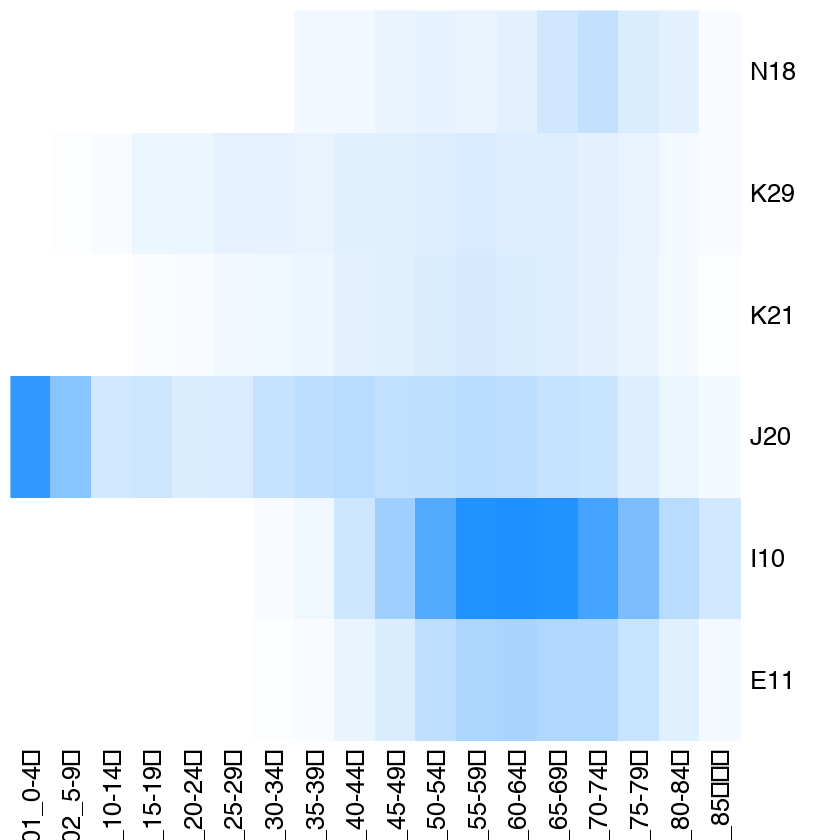

In [40]:
# 구한값에만 열지도를 그려보면 가장 진한 부분이 환자가 많은 부분이 될 것 입니다.
# 한글문제 있습니다. 
library(showtext)
library(extrafont) # 한글폰트 처리
#font_import()
options(warn=-1) # ps font warning 제거 , 나중에 이유를 찿아봐야 함.
par(family="NanumGothic")
heatmap(t_MS_AGE2, col=colorRampPalette(c('white', 'dodgerblue'))(100), 
        scale='none', Rowv=NA, Colv=NA, cexRow=1.5, cexCol=1.5, family="NanumGothic")

중요한 질병 코드 를 KOICD 에서 검색해보면 다음과 같습니다.

| MAIN_SICK     | 질병코드          |
| ------------- |:---------------:|
| N18           | 만성 신장병       |
| K29           | 위염 및 십이자장염  |
| K21           | 위-식도 역류병     |
| J20           | 급성 기관지염      |
| I10           | 본태성 고혈압      |
| E11           | 2형 당뇨병        |

   * 젊은 사람은 K29 위염및 십이지장염으로 고통을 받고 있습니다.
   * 어린 아이는 J20 급성기관지염으로 병원을 찾고 있습니다.
   * 중년에 접어 들수록 I10 고혈압, E11 당뇨병 때문에 병원을 찾고 있습니다.
   * 노년에 접어 들수록 N18 만성신장염 으로 진료를 받는 사람이 많습니다.

열지도에서 질병과 연령대의 관계가 보여집니다. 그러나 숫자가 많아지면 열지도에서 파악은 어려워 질수 있습니다. 질병과 연령대 관계를 좀더 명확하게 파악하고자 대응분석을 합니다. 

먼저 독립성 여부를 위해서 카이제곱 테스트를 시행 해 보자.

In [51]:
chisq <- chisq.test(t_MS_AGE2)
chisq


	Pearson's Chi-squared test

data:  t_MS_AGE2
X-squared = 119210, df = 85, p-value < 2.2e-16


* 카이제곱 값은 119210 이고, 자유도 는 85 입니다. 이것은 (6 - 1) (18 - 1) = 5 * 17 = 85 입니다.

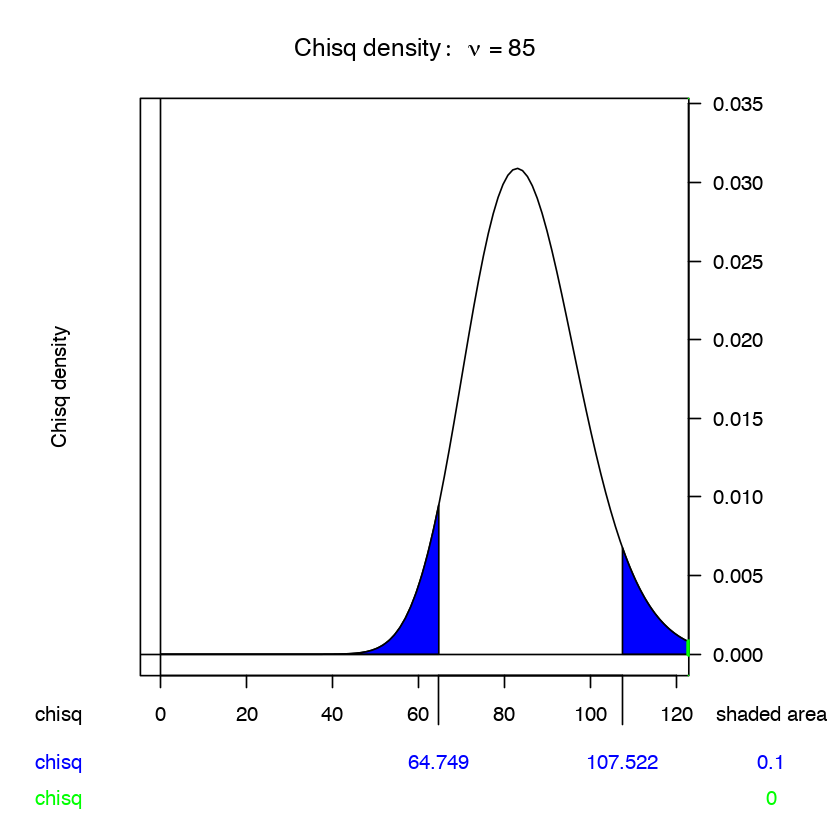

In [62]:
library(HH)
old.omd <- par(omd=c(.05,.88, .05,1))
chisq.setup(df=85)
chisq.curve(df=85, col='blue',alpha=c(0.05,0.05))
chisq.observed(119210, df=85)
par(old.omd)

그림에서 유의값을 0.05 로 지정하였고 푸른색으로 칠한 부분이다. 여 영역에 값이 들어올려면 카이제곱은 64.749 보다 작거나 107.522 보다 커야 한다.  
관측된 카이제곱은 119210 으로 계산된 p값은 거의 0 이다. 그래프에서 녹색 부분. 따라서 귀무가설 $H_0$ 가 기각되고 질병과 년령대는 아주 강력한 상관관계가 있다고 보여진다. 즉 두 범주형 변수는 서로 종속적인 관계에 있다고 한다.  

이제 이들 종속적인 관계가 어떤 모습인지를 보려면 대응분석으로 서로 상관관계를 살펴 보아야 한다.

R 에서는 대응분석에 관련된 함수를 여러 패키지에서 제공합니다.

이들 각각은 
* CA() [FactoMineR package]
* ca() [ca package]
* dudi.coa() [ade4 package]
* corresp() [MASS package]
* epCA() [ExPosition package]

어느것을 사용해도 필요한 정보를 뽑을수 있습니다. 여기서는 ca[ca package] 와 CA[FactoMineR package] 두가지만 예를 들어 설명하겠습니다.

In [75]:
# ca 분석을 의한 라이브러리를 로드 합니다.
library(ca)
library(FactoMineR)

# graphic library
library(factoextra)

Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:latticeExtra’:

    layer

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [65]:
res.ca = ca(t_MS_AGE2)

In [66]:
res.ca


 Principal inertias (eigenvalues):
           1        2        3        4        5       
Value      0.356329 0.055595 0.015852 0.002947 0.000386
Percentage 82.65%   12.9%    3.68%    0.68%    0.09%   


 Rows:
              E11       I10       J20       K21      K29       N18
Mass     0.133775  0.344103  0.270221  0.081023 0.096682  0.074196
ChiDist  0.475408  0.497077  0.934569  0.433888 0.614544  0.615068
Inertia  0.030235  0.085023  0.236016  0.015253 0.036513  0.028069
Dim. 1  -0.777472 -0.802510  1.550912 -0.135101 0.267871 -0.726320
Dim. 2  -0.375307 -0.453151 -0.541862  1.675243 2.483776 -0.314176


 Columns:
         01_0-4세  02_5-9세 03_10-14세 04_15-19세 05_20-24세 06_25-29세
Mass     0.049471  0.029252   0.012816   0.018262   0.015999   0.019474
ChiDist  1.620993  1.553828   1.350552   1.166091   1.085370   1.093746
Inertia  0.129991  0.070626   0.023377   0.024833   0.018847   0.023296
Dim. 1   2.575177  2.504961   2.247444   1.784289   1.467481   1.296795
Dim. 2  -2.176862 -

In [67]:
res.CA = CA(t_MS_AGE2, graph = F)

In [68]:
res.CA

**Results of the Correspondence Analysis (CA)**
The row variable has  6  categories; the column variable has 18 categories
The chi square of independence between the two variables is equal to 119212.6 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

* 가로변수 질병은 6 종류이며, 세로변수 연령대는 모두 18 종류 수준으로 나누어져 있습니다.
* 이 둘사이 독립성 여부를 보기위해서 카이제곱을 보면 res1.ca 에 119212.6 입니다. p 값이 0 이라는 것은 아주 강한 종속관계입니다. 
    * 즉 환자의 질병 종류와 연령대는 아주 강한 종속 관계를 가지고 있습니다.
* 고유값을 살펴보면 

In [69]:
res.CA$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.3563289223,82.65387479,82.65387
dim 2,0.0555954325,12.89588813,95.54976
dim 3,0.0158516809,3.67694780,99.22671
dim 4,0.0029472450,0.68364145,99.91035
dim 5,0.0003864805,0.08964782,100.00000


dim1, dim2 가 전체의 95%를 차지 합니다. 따라서 주축 dim1, dim2 만 선택하면 될 것 입니다. 이것을  barplot 으로 살펴보면 다음과 같습니다.

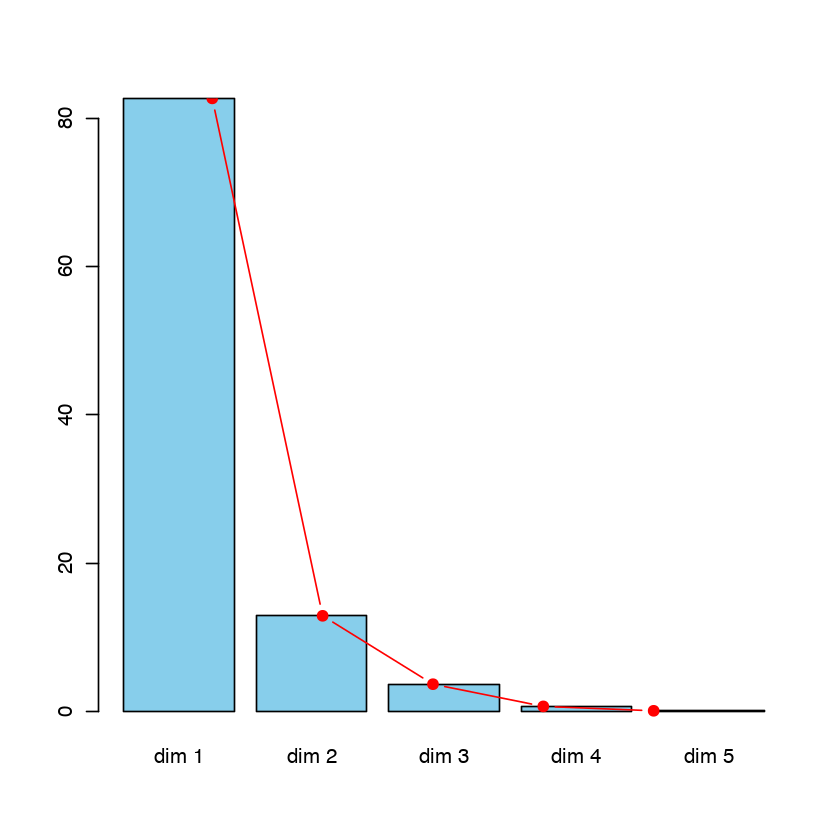

In [70]:
# barplot of percentage of variance
barplot(res.CA$eig[,2], names.arg=rownames(res.CA$eig), col="skyblue")
# 연결선 추가
lines(x = 1:nrow(res.CA$eig), res.CA$eig[,2], type = "b", pch=19, col="red")

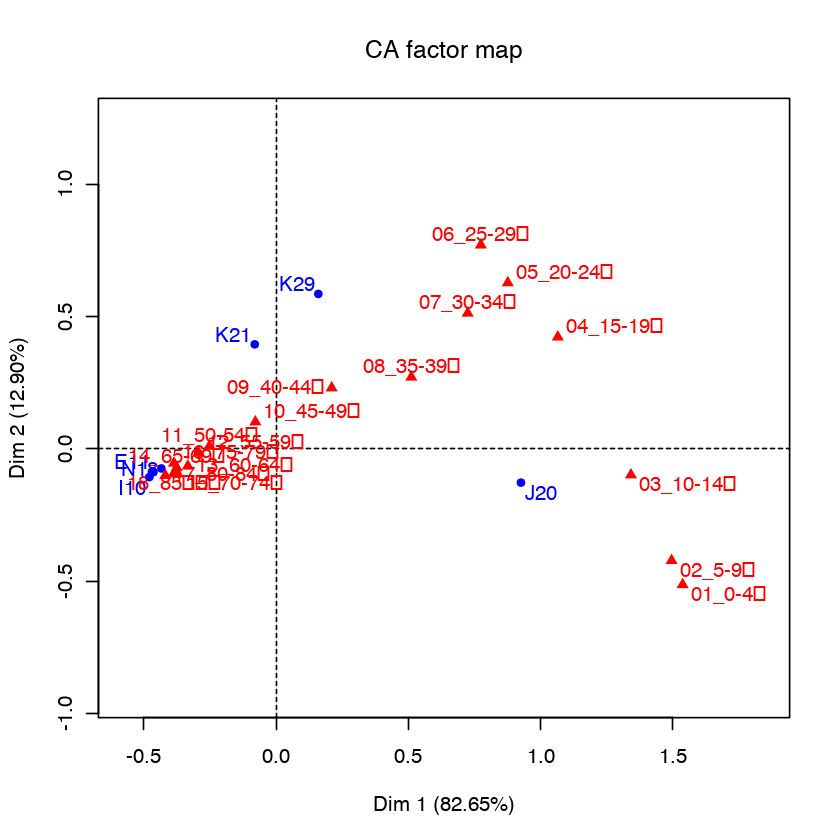

In [74]:
plot(res.CA)

대응분석에 나온 행렬도 (biplot) 입니다. 그래프에서 네모는 한글을 표시 할 수 없어서 글씨가 깨져 나온것입니다.  일단 빨간색은 세로변수 년령대 입니다. 푸른 색은 가로변수 질병입니다.  

연령대가 겹쳐서 보기 어렵기 때문에 다른 형식의 함수를 사용해 봅니다.

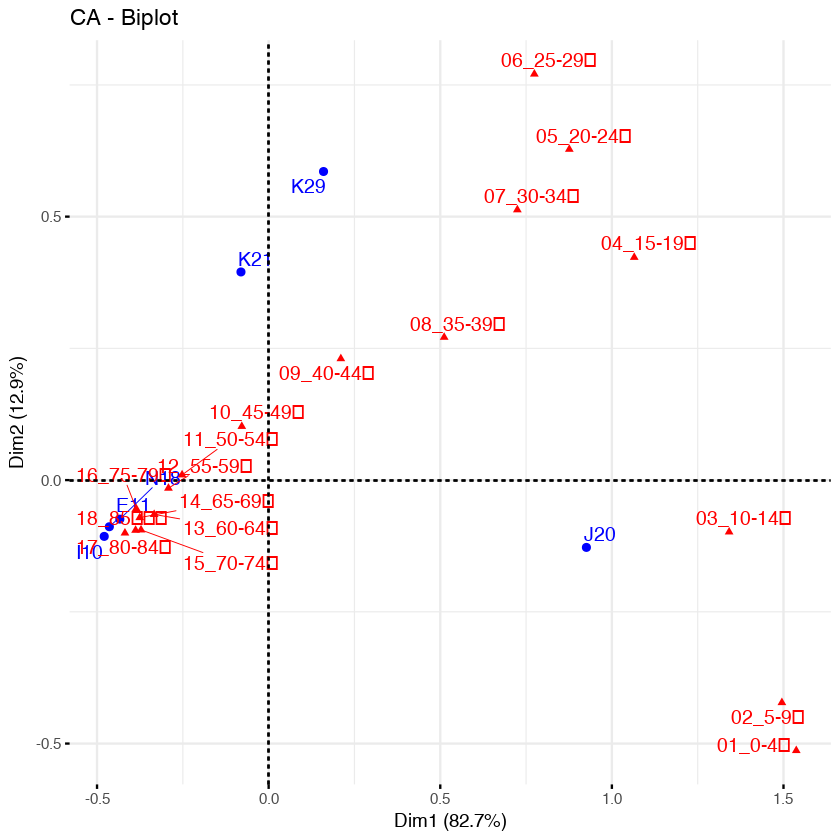

In [77]:
# repel= TRUE to avoid text overlapping (slow if many point)
# 아래 함수는 라벨이 겹치지 않도록 표시하는 기능이 있습니다.

fviz_ca_biplot(res.CA, repel = TRUE)

먼저 그래프를 보기전에 원래 교차표는 어떻게 생겼는지 확인 해보자.
가로로 나열되어 있는 변수수순이 연령대이므로 보기 좋게 하기 위하여 transpose 하면 다음과 같이 됩니다.
연령대는 원래 수준이 가로로 나열되어 있고, 질병은 수준이 세로로 나열되어 있는것을 보기 좋게 transpose 한것입니다.

In [78]:
 t(t_MS_AGE2)

             
                E11   I10   J20   K21   K29   N18
  01_0-4세        0     0 13543    29   108     0
  02_5-9세        0     0  7755    53   281     0
  03_10-14세      3     1  2997    89   454     0
  04_15-19세     17    19  3295   386  1325     8
  05_20-24세     81    78  2408   571  1285     1
  06_25-29세     67   137  2594   927  1648    12
  07_30-34세    272   461  3762  1181  1722   134
  08_35-39세    539  1120  4451  1260  1627  1010
  09_40-44세   1451  3283  4646  1863  2027  1007
  10_45-49세   2416  6339  4062  1961  2012  1423
  11_50-54세   4195 11166  4279  2450  2281  1772
  12_55-59세   5377 14514  4738  2785  2597  1385
  13_60-64세   5650 14859  4417  2425  2295  1803
  14_65-69세   5287 14466  3845  2268  2248  3127
  15_70-74세   5096 12299  3692  1931  1922  4005
  16_75-79세   3712  8688  2331  1358  1610  2452
  17_80-84세   1949  4703  1204   619   786  1893
  18_85세이상   880  3020   704   249   507   485

그래프에서 Dim1, Dim2 는 각각 svd 한 결과 가장 많은 정보를 포함하고 있는 축을 순서대로 2개를 선택하여 각각 Dim1, Dim2 라고 지정합니다. 이것은 res.CA$eig 를 보면 각 고유값별고 큰것부터 순서대로 나열되어 있습니다. 즉 Dim1 이 82.65\% Dim2 가 12.90 \% 입니다. 이 축이 각각 그래프에서 가로축을 Dim1, 세로축을 Dim2 로 정합니다.

In [80]:
res.CA$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.3563289223,82.65387479,82.65387
dim 2,0.0555954325,12.89588813,95.54976
dim 3,0.0158516809,3.67694780,99.22671
dim 4,0.0029472450,0.68364145,99.91035
dim 5,0.0003864805,0.08964782,100.00000


그래프에서 파란색은 가로변수로 질병을 빨간색은 세로변수로 연령대를 나타냅니다. 각 범주형변수들의 빈도 비율이 주축 Dim1, Dim2 좌표에 표시 되어 있습니다. 

그래프에서 파란색이든 빨간색이든 같은 지역내에 모여 있는것은 서로 비숫한 성질을 가지고 있다는 것을 말합니다. 

파란색에서 보면 즉 질병분류에서 E11, I10, N18 은 같은 영역에 모여 있습니다. 다른 것들에 비해서 서로간의 거리가 매우 가깞습니다. 원인을 살펴보면 연령대 구성이 비숫하다고 합니다. 이것은 가로좌표별 세로좌표의 구성을 보면 할 수 있습니다. 지금은 일단 이들은 그래프상에서 보면 50대 이상의 년령대가 모여서 그렇다고 이해를 하면 되겠습니다.  

J20 은 낮은 연령대와 관련이 깊고, K21, K29 는 중간 연령대가 비교적 높다는 것을 알수 있습니다. 이와 같이 대응분석은  같은 변수에서 서로 비숫한 패턴이 보이는 것을 묶어주고 관련이 깊은 수준을 묶어줍니다.

### 좀더 심화 과정

### 1. 가로변수, 세로변수들이 어떻게 서로 연관이 있는지?

In [82]:
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:HH’:

    residplot

The following object is masked from ‘package:stats’:

    lowess



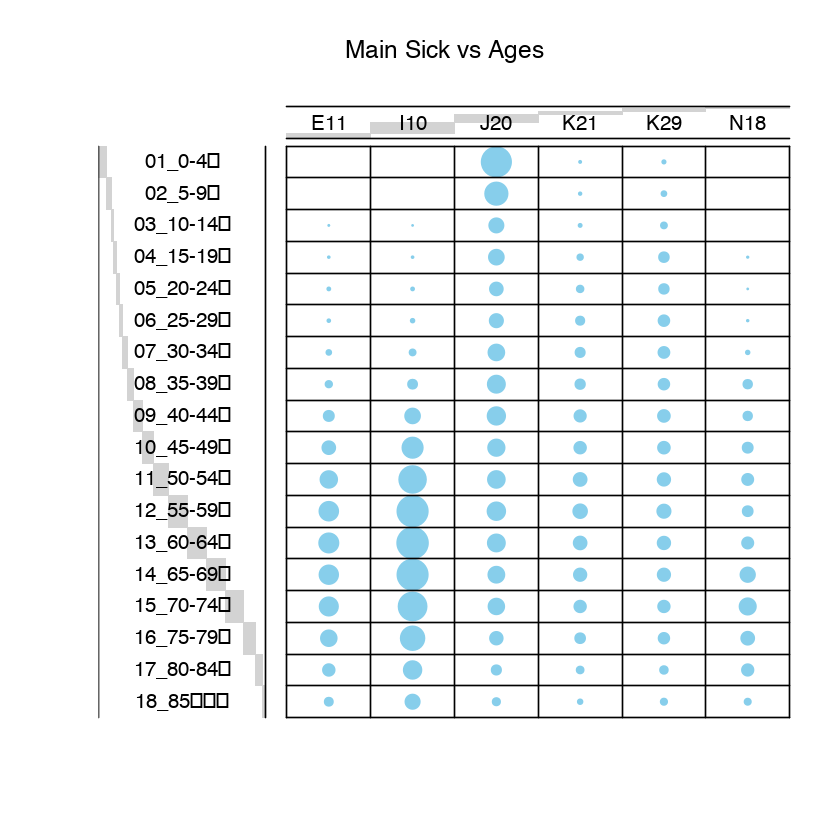

In [85]:
# 2. balloonplot() 으로 표시
balloonplot((t_MS_AGE2), main="Main Sick vs Ages", xlab="", ylab="", label = F, show.margins = F)

원의 크기가 셀에 포함된 숫자의 크기를 표시합니다. 따라서 숫자가 크면 원모양이 커집니다. 가로로 나열된 부분이 질병이고 세로로 나열된 부분이 연령대 입니다. 
I10 인 경우에는 50 - 70 대에 원의 모양이 크고, J20 인 경우에는 영유아에 원모양이 큽니다. 이그래프는 단순 숫자에 대한 직접 비교라서 원의 상대적인 크기에 의미를 부여하긴 어렵지만, 직관적으로 어느 부분의 원이 큰지를 확인하고 상세 분석을 할 수 있게 됩니다.

### 2. 주축에 기여를 하는 각 가로및 세로 변수들은 ???

res.CA 내용중 row (가로변수) 부분을 살펴보면

In [87]:
res.CA$row

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
E11,-0.46409893,-0.08849240,-0.023801985,-0.005589838,-4.686793e-02
I10,-0.47904443,-0.10684710,-0.075685070,0.014740662,1.550020e-02
J20,0.92579019,-0.12776393,-0.001740534,-0.002125189,3.477901e-05
K21,-0.08064641,0.39500032,-0.033844188,-0.156645072,6.796683e-03
K29,0.15990128,0.58564157,0.005671532,0.095293517,-2.718704e-03
N18,-0.43356417,-0.07407867,0.429831507,-0.003659294,8.610114e-03
,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
E11,8.0861813,1.8842836,0.478106285,0.14182593,7.603215e+01
I10,22.1609611,7.0660139,12.434639386,2.53691439,2.139120e+01
J20,64.9970985,7.9340933,0.005164279,0.04140939,8.457205e-05


이중 contrib 부분이 각 주축별로 비중을 나타내는 값입니다. 이것을 그래프로 표시하면

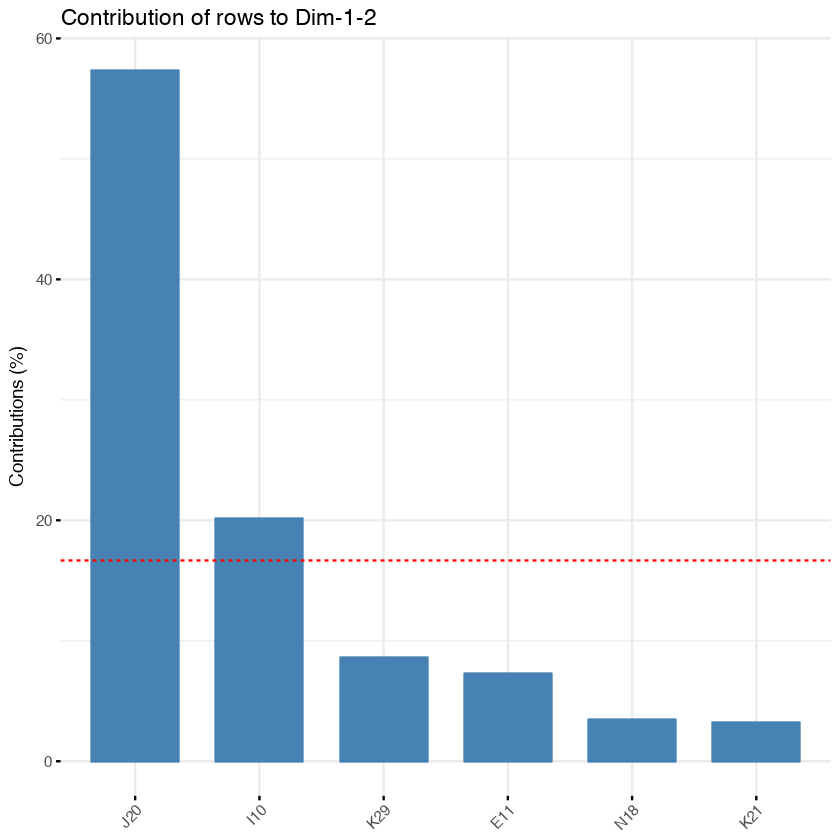

In [97]:
fviz_contrib(res.ca, choice = "row", axes = 1:2, top = 10)

In [99]:
res.CA$col$contrib

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
01_0-4세,32.8069594,23.44301531,0.06029951,1.61445933,2.482096e-02
02_5-9세,18.3553372,9.38031909,0.03338313,0.02047308,5.375972e-03
03_10-14세,6.4734711,0.22330969,0.01366427,6.18768803,2.888602e-01
04_15-19세,5.8141643,5.86964617,0.02674877,28.65111614,8.071568e-01
05_20-24세,3.4452892,11.34157040,0.18164481,7.68874193,2.430826e+00
06_25-29세,3.2748708,20.79976893,0.29720359,0.48519996,4.469193e-01
07_30-34세,4.0131980,12.89376825,0.08044858,3.21376555,3.040753e-01
08_35-39세,2.6557352,4.78414236,12.54711874,7.33490629,6.267991e+00
09_40-44세,0.6408999,4.92990389,0.81991879,15.09401429,2.183883e-01
10_45-49세,0.1131853,1.22911142,0.01205145,5.56798939,3.698345e+00


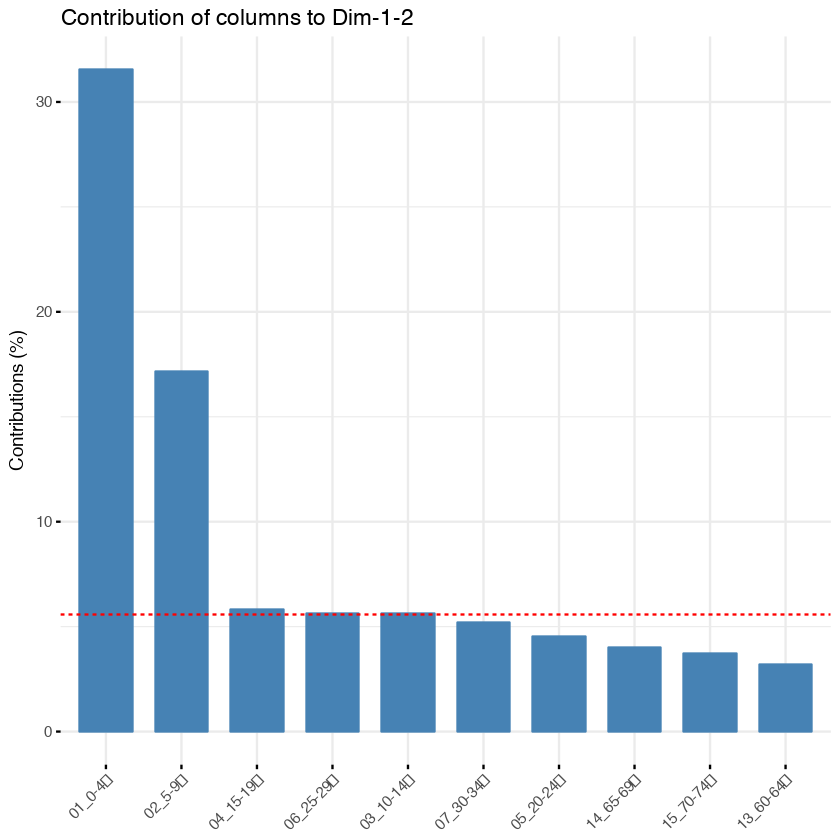

In [98]:
fviz_contrib(res.ca, choice = "col", axes = 1:2, top = 10)

이 그래프를 보면 각 축에 제일 영향을 주는 성분은 연령대는 영유아 이고, 질병은 J20 입니다. 즉 실제 병원을 제일 많이 이용하는 부분은 질병은 J20 기관지염 이고 연령대는 당연히 영유아 부분이 될 것입니다.

### 각 질병사이 또는 연령별 사이 거리 구하기?? 이것은 다음에... 숙제로

Ca 행렬도를 보면 각 그룹이 군집을 이루는 것이 보입니다. 그리고 그것의 내용을 살펴보면 모여있는 연령대이면 그것에 영향을 주는것은 질명이고, 또한 질병이 군집을 이루고 있으면 그 원인을 살펴보면 비숫한 연령대임을 알 수 있습니다. 실제 이것을 그래프로 표현 할 수 있는데  이부분은 [여기](http://localhost:8888/notebooks/PART04/23-95%25%20R로%20분석%20다시보기-2-treat-4-선형대수기초-대응분석관련-12.ipynb) 를 참조 하면 풀 수 있습니다. 이부분은 숙제로 남기거나 나중에 시간이 나면 풀어 보도록 하겠습니다.